<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_4_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,1.364880e+06,1.365008e+06,-3.634572e+06,4.999581e+06
1,0.0,1.0,47.067808,95.047509,91.779690,-1.152593e+08,-1.152590e+08,1.651137e+07,-1.317704e+08
2,0.0,2.0,99.291665,61.179446,95.992578,-7.717224e+05,-7.714559e+05,2.105884e+07,-2.183029e+07
3,0.0,3.0,36.059748,81.961304,62.806562,1.494396e+07,1.494415e+07,7.492072e+06,7.452080e+06
4,0.0,4.0,22.561835,57.403703,99.891733,-9.610869e+06,-9.610679e+06,4.696314e+06,-1.430699e+07
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,8.577543e+05,8.578744e+05,-6.167957e+06,7.025832e+06
29996,999.0,26.0,93.324773,99.972234,27.596461,-8.455610e+06,-8.455379e+06,1.973200e+07,-2.818738e+07
29997,999.0,27.0,28.102838,93.083445,72.411123,-2.800885e+07,-2.800864e+07,-1.828726e+07,-9.721379e+06
29998,999.0,28.0,30.257867,20.848863,55.174370,-4.945367e+04,-4.933739e+04,-1.987048e+06,1.937711e+06


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,1.364880e+06,1.365008e+06,-3.634572e+06,4.999581e+06
1,0.0,1.0,47.067808,95.047509,91.779690,-1.152593e+08,-1.152590e+08,1.651137e+07,-1.317704e+08
2,0.0,2.0,99.291665,61.179446,95.992578,-7.717224e+05,-7.714559e+05,2.105884e+07,-2.183029e+07
3,0.0,3.0,36.059748,81.961304,62.806562,1.494396e+07,1.494415e+07,7.492072e+06,7.452080e+06
4,0.0,4.0,22.561835,57.403703,99.891733,-9.610869e+06,-9.610679e+06,4.696314e+06,-1.430699e+07
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,8.577543e+05,8.578744e+05,-6.167957e+06,7.025832e+06
29996,999.0,26.0,93.324773,99.972234,27.596461,-8.455610e+06,-8.455379e+06,1.973200e+07,-2.818738e+07
29997,999.0,27.0,28.102838,93.083445,72.411123,-2.800885e+07,-2.800864e+07,-1.828726e+07,-9.721379e+06
29998,999.0,28.0,30.257867,20.848863,55.174370,-4.945367e+04,-4.933739e+04,-1.987048e+06,1.937711e+06


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    44.623839  37.451801  ... -3.634572e+06  4.999581e+06
      1.0    47.067808  95.047509  ...  1.651137e+07 -1.317704e+08
      2.0    99.291665  61.179446  ...  2.105884e+07 -2.183029e+07
      3.0    36.059748  81.961304  ...  7.492072e+06  7.452080e+06
      4.0    22.561835  57.403703  ...  4.696314e+06 -1.430699e+07
...                ...        ...  ...           ...           ...
999.0 25.0   22.165046  31.666469  ... -6.167957e+06  7.025832e+06
      26.0   93.324773  99.972234  ...  1.973200e+07 -2.818738e+07
      27.0   28.102838  93.083445  ... -1.828726e+07 -9.721379e+06
      28.0   30.257867  20.848863  ... -1.987048e+06  1.937711e+06
      29.0   90.716789  93.036058  ...  1.420657e+06  8.494506e+07

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    44.623839  37.451801  ... -3.634572e+06  4.999581e+06
      1.0    47.067808  95.047509  ...  1.651137e+07 -1.317704e+08
      2.0    99.291665  61.179446  ...  2.105884e+07 -2.183029e+07
      3.0    36.059748  81.961304  ...  7.492072e+06  7.452080e+06
      4.0    22.561835  57.403703  ...  4.696314e+06 -1.430699e+07
...                ...        ...  ...           ...           ...
999.0 25.0   22.165046  31.666469  ... -6.167957e+06  7.025832e+06
      26.0   93.324773  99.972234  ...  1.973200e+07 -2.818738e+07
      27.0   28.102838  93.083445  ... -1.828726e+07 -9.721379e+06
      28.0   30.257867  20.848863  ... -1.987048e+06  1.937711e+06
      29.0   90.716789  93.036058  ...  1.420657e+06  8.494506e+07

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,44.623839,37.451801,35.866901,1.364880e+06,1.365008e+06,-3.634572e+06,4.999581e+06
1,0.0,1.0,47.067808,95.047509,91.779690,-1.152593e+08,-1.152590e+08,1.651137e+07,-1.317704e+08
2,0.0,2.0,99.291665,61.179446,95.992578,-7.717224e+05,-7.714559e+05,2.105884e+07,-2.183029e+07
3,0.0,3.0,36.059748,81.961304,62.806562,1.494396e+07,1.494415e+07,7.492072e+06,7.452080e+06
4,0.0,4.0,22.561835,57.403703,99.891733,-9.610869e+06,-9.610679e+06,4.696314e+06,-1.430699e+07
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.165046,31.666469,56.220772,8.577543e+05,8.578744e+05,-6.167957e+06,7.025832e+06
29996,999.0,26.0,93.324773,99.972234,27.596461,-8.455610e+06,-8.455379e+06,1.973200e+07,-2.818738e+07
29997,999.0,27.0,28.102838,93.083445,72.411123,-2.800885e+07,-2.800864e+07,-1.828726e+07,-9.721379e+06
29998,999.0,28.0,30.257867,20.848863,55.174370,-4.945367e+04,-4.933739e+04,-1.987048e+06,1.937711e+06


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...         y_hat         e_hat
rep   index                        ...                            
0.0   0.0    44.623839  37.451801  ... -3.634572e+06  4.999581e+06
      1.0    47.067808  95.047509  ...  1.651137e+07 -1.317704e+08
      2.0    99.291665  61.179446  ...  2.105884e+07 -2.183029e+07
      3.0    36.059748  81.961304  ...  7.492072e+06  7.452080e+06
      4.0    22.561835  57.403703  ...  4.696314e+06 -1.430699e+07
...                ...        ...  ...           ...           ...
999.0 25.0   22.165046  31.666469  ... -6.167957e+06  7.025832e+06
      26.0   93.324773  99.972234  ...  1.973200e+07 -2.818738e+07
      27.0   28.102838  93.083445  ... -1.828726e+07 -9.721379e+06
      28.0   30.257867  20.848863  ... -1.987048e+06  1.937711e+06
      29.0   90.716789  93.036058  ...  1.420657e+06  8.494506e+07

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

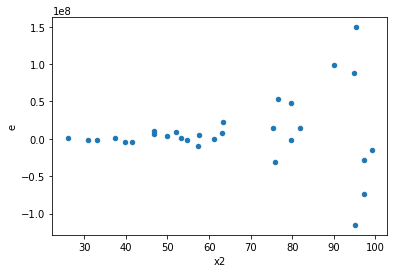

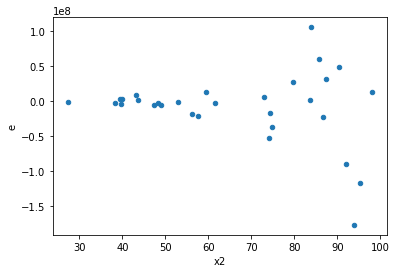

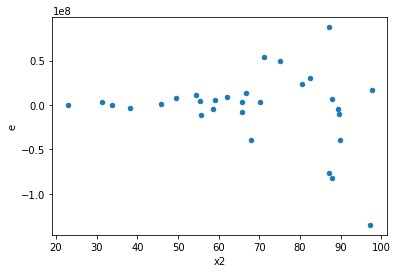

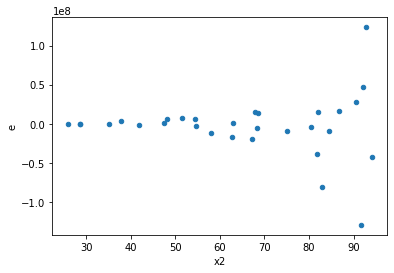

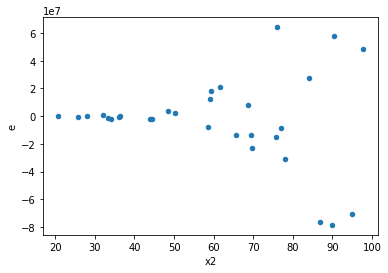

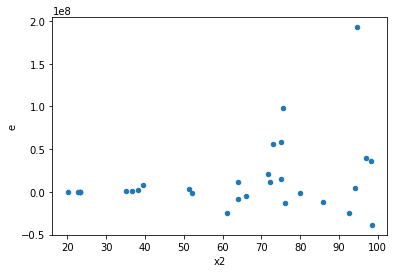

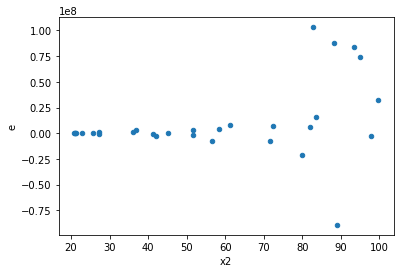

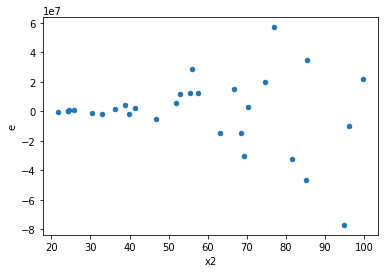

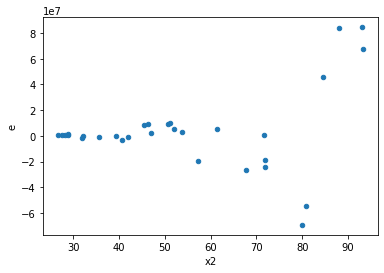

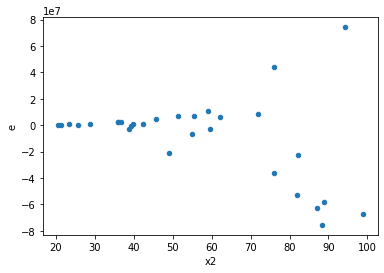

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,5.95575533074708e+16,156119419034138.5,7444694163433850.0,19514927379267.312,381.4871569208658,3.140645521426677e-10,0.9999999998429677,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,4.2092606725493496e+16,214979695189210.47,5261575840686687.0,26872461898651.31,195.7980575256024,6.203322300279979e-09,0.9999999968983388,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,2.4441623622999108e+16,378579602186270.0,3055202952874888.5,47322450273283.75,64.56138545724727,8.473338486414406e-07,0.9999995763330757,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,3.652988985160296e+16,176280386528360.25,4566236231450370.0,22035048316045.03,207.2260594103359,4.81568673826871e-09,0.9999999975921566,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,2.741787526986502e+16,29823822853831.855,3427234408733127.5,3727977856728.982,919.3279950810294,6.066702695761705e-12,0.9999999999969666,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,4.438053058538989e+16,359660298672827.6,5547566323173736.0,44957537334103.45,123.39568962478549,4.846159518123727e-08,0.9999999757692024,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,2.0486230180121636e+16,21783647893160.35,2560778772515204.5,2722955986645.044,940.440750814464,5.4785065373152975e-12,0.9999999999972607,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,1.0559202476871704e+16,63571492867810.91,1319900309608963.0,7946436608476.363,166.09964624911774,1.2918148550866704e-08,0.9999999935409257,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1.3719112596482448e+16,66486020180461.01,1714889074560306.0,8310752522557.626,206.34582366706675,4.908082162913274e-09,0.9999999975459589,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,5.95575533074708e+16,156119419034138.5,7444694163433850.0,19514927379267.312,381.4871569208658,3.140645521426677e-10,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,4.2092606725493496e+16,214979695189210.47,5261575840686687.0,26872461898651.31,195.7980575256024,6.203322300279979e-09,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,2.4441623622999108e+16,378579602186270.0,3055202952874888.5,47322450273283.75,64.56138545724727,8.473338486414406e-07,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,3.652988985160296e+16,176280386528360.25,4566236231450370.0,22035048316045.03,207.2260594103359,4.81568673826871e-09,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,2.741787526986502e+16,29823822853831.855,3427234408733127.5,3727977856728.982,919.3279950810294,6.066702695761705e-12,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,4.438053058538989e+16,359660298672827.6,5547566323173736.0,44957537334103.45,123.39568962478549,4.846159518123727e-08,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,2.0486230180121636e+16,21783647893160.35,2560778772515204.5,2722955986645.044,940.440750814464,5.4785065373152975e-12,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,1.0559202476871704e+16,63571492867810.91,1319900309608963.0,7946436608476.363,166.09964624911774,1.2918148550866704e-08,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,1.3719112596482448e+16,66486020180461.01,1714889074560306.0,8310752522557.626,206.34582366706675,4.908082162913274e-09,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    998
Reject001=1 : Homoscedasticity        2
Name: Result_test, dtype: int64